label
squat           5371
pushup          4006
jumping_jack    3075
Name: count, dtype: int64
Total samples: 12452
Columns available: ['time', 'p_ax', 'p_ay', 'p_az', 'p_gx', 'p_gy', 'p_gz', 'a_ax', 'a_ay', 'a_az', 'a_gx', 'a_gy', 'a_gz', 'label', 'reps']


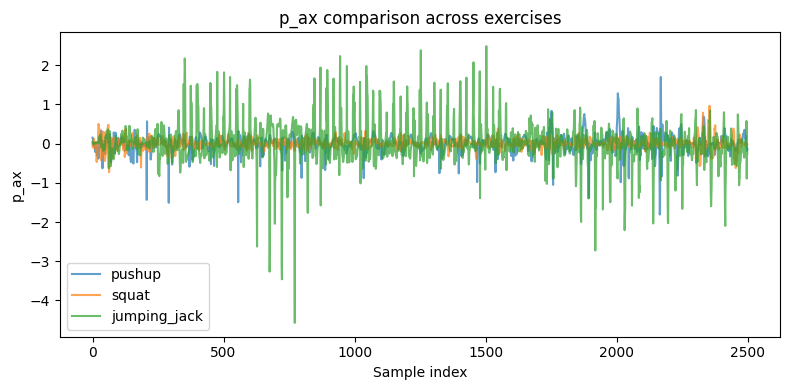

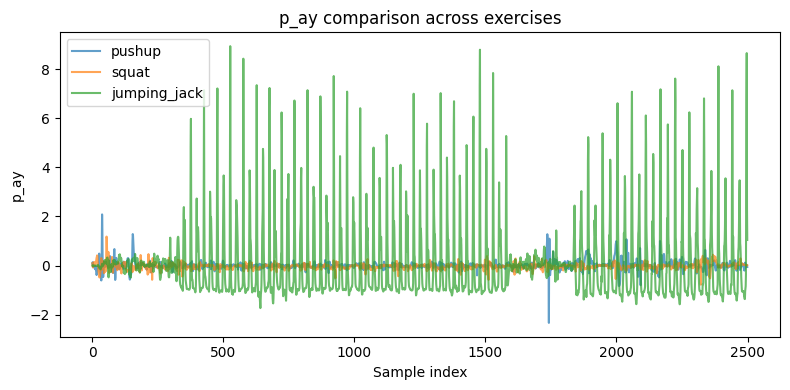

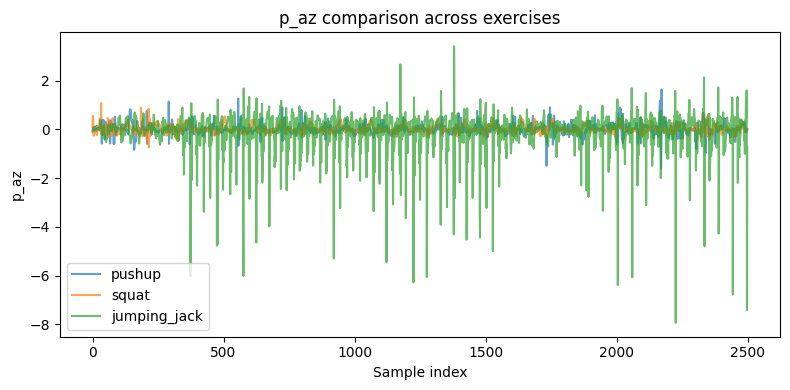

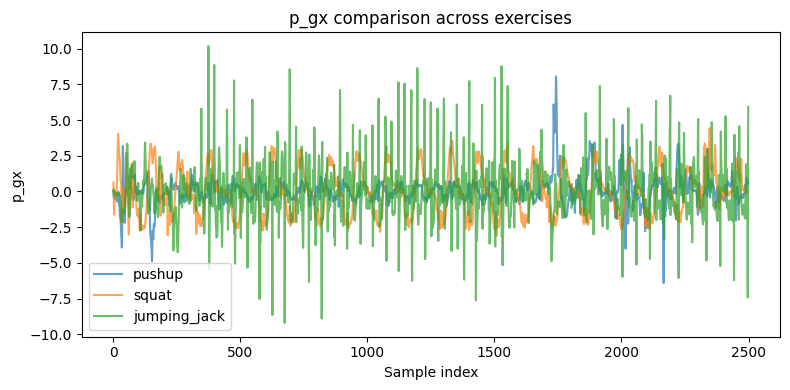

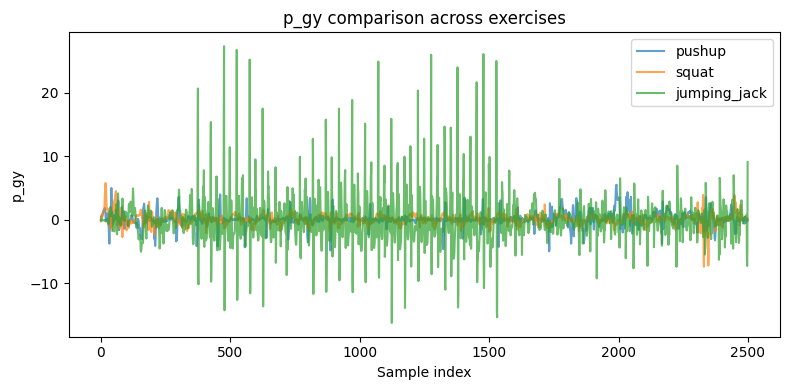

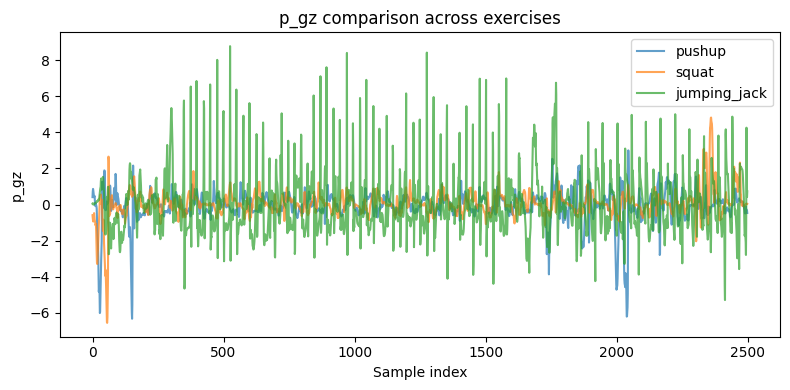

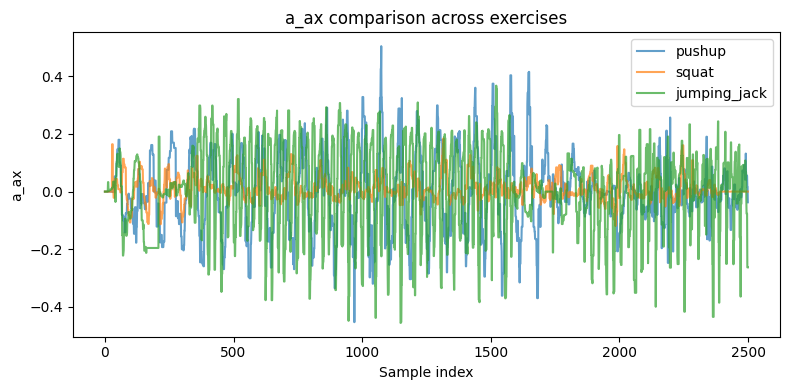

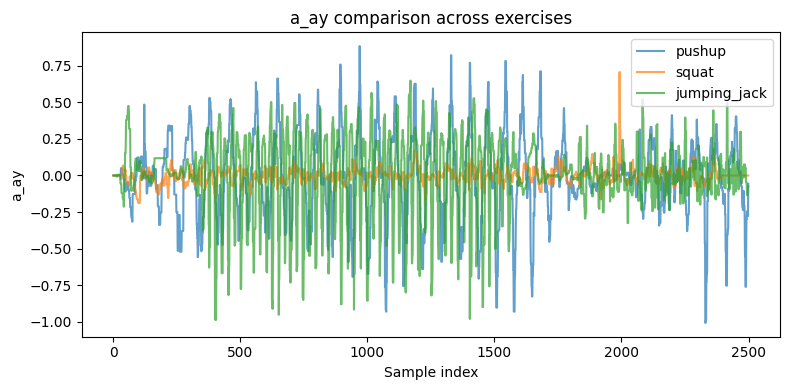

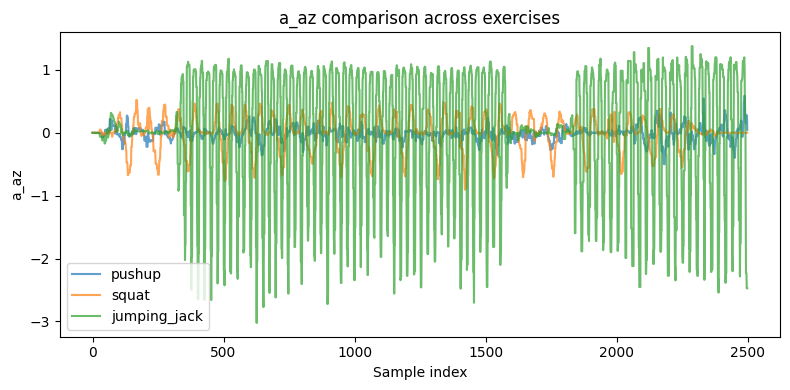

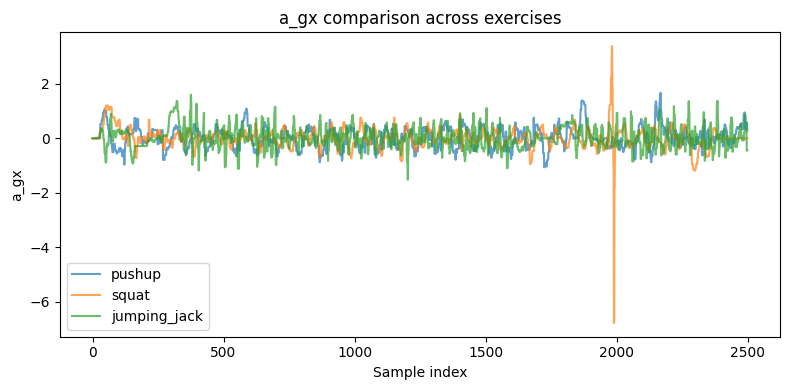

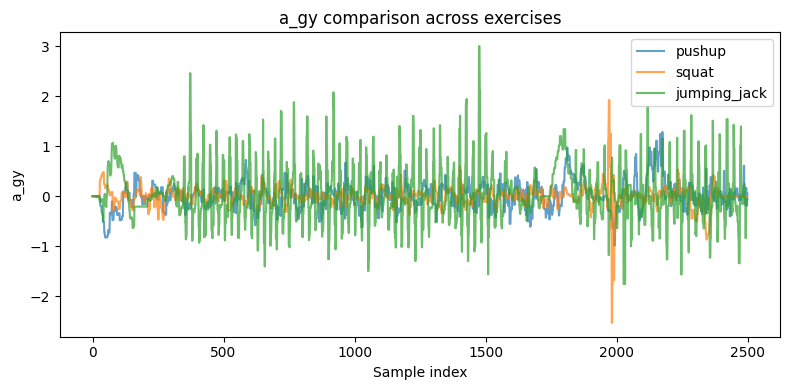

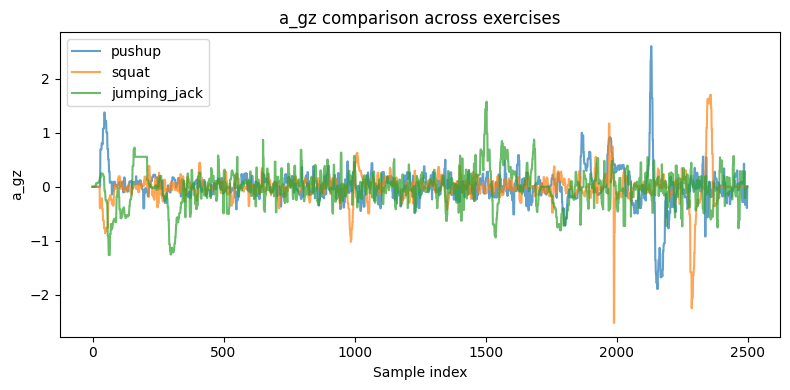

In [5]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

# === Load and combine all .xlsx files ===
xlsx_files = glob('../data/raw/*.xlsx')
dfs = [pd.read_excel(f) for f in xlsx_files]
df_combined = pd.concat(dfs, ignore_index=True)

# === Basic info ===
print(df_combined['label'].value_counts())
print(f"Total samples: {len(df_combined)}")
print("Columns available:", df_combined.columns.tolist())

# === Fields to analyze ===
fields = [
    'p_ax', 'p_ay', 'p_az',
    'p_gx', 'p_gy', 'p_gz',
    'a_ax', 'a_ay', 'a_az',
    'a_gx', 'a_gy', 'a_gz'
]

# === Exercises to compare ===
exercises = ['pushup', 'squat', 'jumping_jack']

# === Loop through each field and plot separately ===
for field in fields:
    plt.figure(figsize=(8, 4))
    
    for exercise in exercises:
        sample = df_combined[df_combined['label'] == exercise].iloc[:2500]
        plt.plot(sample[field].reset_index(drop=True), label=exercise, alpha=0.7)
    
    plt.title(f'{field} comparison across exercises')
    plt.xlabel('Sample index')
    plt.ylabel(field)
    plt.legend()
    plt.tight_layout()
    plt.show()
